El objetivo principal de los métodos monte carlo aplicados a estadística bayesiana es 
construir muestras de la densidad de probabilidad posterior.
En el caso de Metropolis-Hastings la exploración se hace dando pasos en el espacio de parámetros, 
el lugar de llegada de cada paso (que puede ser rechazadoo aceptado) se *adivina* sin tener en cuenta
la forma del prior. 
La información del prior solamente se utiliza para aceptar o rechazar el paso propuesto.

Esto es condiderado una falla. O al menos una elección que no es óptima. Sería deseable 
usar toda la información disponible en cada momento, incluso al momento de proponer un nuevo lugar en la cadena.

Los métodos de Monte Carlo Hamiltoniano buscan una mejora haciendo que la propuesta de un nuevo 
punto en la cadena se haga a partir de una **trayectoria** en el espacio de parámetros.

Antes de entrar de lleno en la formulación del Monte Carlo hamiltoniano vamos a hacer
un breve repaso sobre la formulación Hamiltoniana de la mecánica y algunos métodos numéricos
asociados.

# Mecánica Hamiltoniana 

La mecánica clásica puede ser re-escrita en un formalismo matemático conocido como formalismo Hamiltoniana.
Esta reformulación además de ser útil para la mecánica clásica ha sido fundamental para la mecánica
estadística y la mecánica cuántica.

El objeto matemático central en esta formulación es el **Hamiltoniano**, $\mathcal{H}$.
El Hamiltoniano es funcion de las posiciones ($q$) y los momentos ($p$) que describen el sistema que nos interesa. Una vez tenemos el Hamiltoniano en función de $p$ y $q$ podemos encontrar su evolución temporal usando las ecuaciones de Hamilton

$$
\frac{\partial p}{\partial t} = -\frac{\partial \mathcal{H}}{\partial q}
$$

$$
\frac{\partial q}{\partial t} = +\frac{d\mathcal{H}}{\partial p}
$$

En los casos que nos van a interesar el Hamiltoniano corresponde a la energia total del sistema, 
$\mathcal{H}= T+V$ donde $T$ es la energia cinetica y $V$ es la energia potencial.

# Ejemplo 5.1

Una partícula de masa $m$ en un plano bidimensional está conectada por un resorte a un punto fijo.
Para simplificar vamos a tomar el origen del sistema de coordenadas como el punto donde está fijo un extremo del resorte. El otro extremo del resorte, donde está nuestra partícula de masa $m$, tiene coordenadas $x,y$.

La energia cinética se puede escribir en coordenadas cartesianas como $ T = p_x^2/2m + p_y^2/2m$ mientras que la energia potencial es $V=kx^2/2 + ky^2/2$. En este caso el Hamiltoniano del sistema es:

$$
\mathcal{H} = \frac{1}{2m}p_x^2 + \frac{1}{2m}p_y^2 + \frac{k}{2}x^2 + \frac{k}{2}y^2.
$$

# Integracion de las ecuaciones de hamilton

El objetivo ahora es resolver las ecuaciones de hamilton numericamente.
Esto quiere decir que vamos a encontrar $p$ y $q$ como funciones del tiempo.
Dado que esto implica resolver numericamente ecuaciones diferenciales acopladas de primer orden
es necesario dar las condiciones iniciales para todos los $p$ y $q$.

En terminos de diferencias finitas podemos reescribir las ecuaciones de hamilton como

$$
p_{n+1} = p_{n} -\frac{d\mathcal{H}}{dq}\Delta t,
$$

$$
q_{n+1} = q_{n} + \frac{d\mathcal{H}}{dp}\Delta t.
$$

La primera ecuacion recibe el nombre de **kick** (es como un golpe que cambia el momentum) y la segunda ecuacion el de **drift** (es como un movimiento libre a velocidad constante).

## Ejercicio 5.2
Utilizando el mismo ejemplo de antes vamos a resolver las ecuaciones de Hamilton de manera computacional.

Primero definimos las derivadas

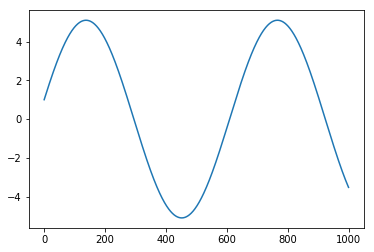

In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def partialH_partialq(p, q, k=1, m=1):
    return k*q

def partialH_partialp(p, q, k=1, m=1):
    return p/m

def kick(p, q, delta_t, k=1, m=1):
    p_new = p - partialH_partialq(p, q, k=k, m=m) * delta_t
    return p_new

def drift(p, q, delta_t, k=1, m=1):
    q_new = q + partialH_partialp(p, q, k=k, m=m) * delta_t
    return q_new

def solve(delta_t = 1E-2, n_steps=1000):
    """
    Resuelve las ecuaciones de Hamilton a traves de 
    un metodo simplectico (i.e. que conserva la energia) kick-drift-kick.
    """
    # condiciones iniciales
    x = [1.0]
    y = [2.0]
    px = [5.0]
    py = [-3.0]
    
    # constante del resorte y masa
    k = 1.0
    m = 1.0
    for i in range(1,n_steps):
        # Primero un nuevo punto con un kick de delta_t/2
        px.append(kick(px[i-1], x[i-1],delta_t/2, k=k, m=m))
        py.append(kick(py[i-1], y[i-1],delta_t/2, k=k, m=m))
        
        # Luego un drift de delta_t con el nuevo momentum 
        x.append(drift(px[i], x[i-1],delta_t, k=k, m=m))
        y.append(drift(py[i], y[i-1],delta_t, k=k, m=m))
        
        # Finalmente otro kick de delta_t/2 para fijar el momentum 
        px[i] = kick(px[i], x[i],delta_t/2, k=k, m=m)
        py[i] = kick(py[i], y[i],delta_t/2, k=k, m=m)
    return np.array(x), np.array(y), np.array(px), np.array(py)

x, y, px, py = solve()
plt.plot(x)

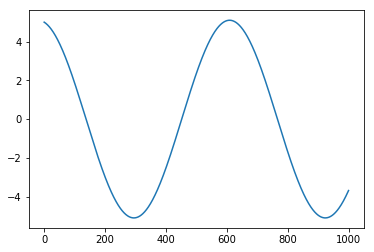

In [87]:
plt.plot(px)

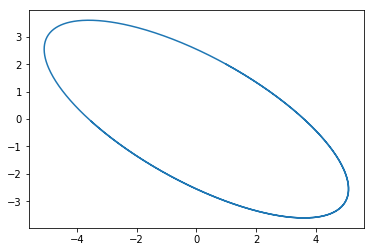

In [88]:
plt.plot(x,y)